# План рекламных кампаний для магазина компьютерных игр

Описание проекта

Интернет-магазин продаёт компьютерные игры по всему миру. Нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.



Оглавление проекта:

1.Откроем файл с данными и изучим общую информацию
2.Подготовим данные
3.Проведем исследовательский анализ данных
4.Составим портрет пользователя каждого региона
5.Проверим гипотезы
6.Общий вывод


In [52]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import plotly.express as px
games = pd.read_csv('/datasets/games.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games.head(3)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [4]:
#Приведем к нижнему регистру

games['Name'] = games['Name'].str.lower()
games['Genre'] = games['Genre'].str.lower()


In [5]:
games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [6]:
#Переименовали столбцы
games = games.rename(columns = {'Name':'name','Platform':'platform','Year_of_Release':'year_of_release','Genre':'genre','NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales','Other_sales':'other_sales','Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating'})

In [7]:
#удалили пропущеные значения
games.dropna(subset = ['name'], inplace = True)

In [ ]:
#удалили пропущеные значения
games = games.dropna(subset = ['name'])

В столбце user_score имеются значения tbd (to be determined) с английского можно перевести как будет определен позднее, то есть, для этих наблюдений оценка пользователей еще не определена. Заменили эти значения на -1.



In [8]:

games['user_score'] = games['user_score'].replace('tbd', -1)

games['user_score'] = pd.to_numeric(games['user_score'])

In [9]:
#Преобразуйте данные в нужные типы: Год к годам,оценку пользователей к числам с плавающей запятой.
games['year_of_release'] = games['year_of_release'].fillna(-1).astype(int)
games['user_score'] = games['user_score'].fillna(-1).astype(float)

In [10]:
games.dropna(subset = ['name'], inplace = True)

In [11]:
games['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

In [51]:
#•	Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,-1.0,NaN,40.24
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,-1.0,NaN,31.38


Посмотрим, сколько игр выпускалось в разные годы.
Для проведения исследования нам необходимы только актуальные данные. Обратим внимание на изменение продаж у платформ, начиная с 2000 года и определим промежуток времени, который будем исследовать в дальнейшем.

Text(0.5, 0, 'Год выпуска')

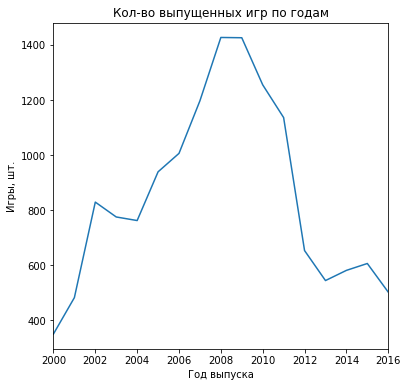

In [13]:
count_year = games.query('year_of_release >= 2000').groupby('year_of_release')['name'].count()
count_year.plot(figsize=(6, 6), title='Кол-во выпущенных игр по годам')
ax = plt.gca()
ax.set_ylabel('Игры, шт.')
ax.set_xlabel('Год выпуска')

Видим, что основная масса новых игр приходится на 2006-2012 годы, после этого периода количество выпускающихся игр идет на спад.

In [14]:
#Посмотрим, как менялись продажи по платформам и ответим на вопрос:
#За какой характерный срок появляются новые и исчезают старые платформы?

games.query('year_of_release > 2000').pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='-')

year_of_release,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,
3DS,-,-,-,-,-,-,-,-,-,-,116,93,91,80,86,46
DC,8,1,-,-,-,-,1,1,-,-,-,-,-,-,-,-
DS,-,-,-,23,118,201,376,492,403,323,153,23,8,-,-,-
GB,10,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
GBA,107,198,150,175,135,39,6,-,-,-,-,-,-,-,-,-
GC,22,152,144,83,97,40,4,-,-,-,-,-,-,-,-,-
N64,9,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-
PC,15,19,33,30,37,52,62,76,107,90,139,61,38,47,50,54
PS,91,20,3,-,-,-,-,-,-,-,-,-,-,-,-,-


По распределению можно заметить, что примерно в 2006 году рынок платформ меняется и на замену старым приходят новые.

Для дальнейшего исследования нам будет достаточно последних 10 лет.
Оставим данные с 2006 года по 2016 включительно.

In [15]:
games_new = games.query('year_of_release > 2006')

In [16]:
#найдем платформы с наибольшими суммарными продажами
platform_sales = games_new.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
platform_sales.head(10)

,platform,total_sales
0,PS3,910.38
1,X360,901.37
2,Wii,754.03
3,DS,535.54
4,PS4,314.14
5,3DS,257.81
6,PSP,183.31
7,PS2,162.38
8,PC,160.57
9,XOne,159.32


In [17]:
#Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
top_platforms = platform_sales['platform'].to_list()
top_platforms

['PS3',
 'X360',
 'Wii',
 'DS',
 'PS4',
 '3DS',
 'PSP',
 'PS2',
 'PC',
 'XOne',
 'WiiU',
 'PSV',
 'GBA',
 'XB',
 'GC',
 'DC']

Text(0.5, 0, 'Выручка, млн дол.')

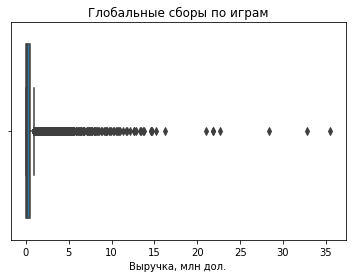

In [18]:
#Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
#берем только те игры, общие продажи которых больше 1 млн долларов
g = games_new.query('total_sales > -1')
ax = sns.boxplot('total_sales', data= g)
ax.set_title('Глобальные сборы по играм')
ax.set_xlabel('Выручка, млн дол.')

Разница в продажах игр очень велика. Нормальные значения продаж не превышают 6-7 миллионов долларов, но при этом на графике очень много выбросов (больших значений), и есть даже такие игры, продажи которых принесли 35 млн долларов.

•	Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами

Text(0, 0.5, '')

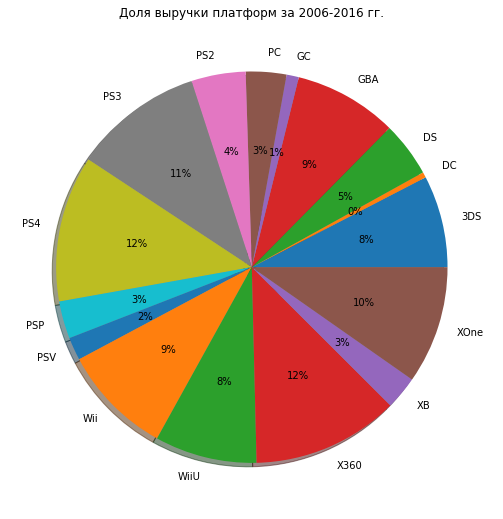

In [19]:
#посмотрим на среднюю выручку платформ по годам за выбранный период
revenue_mean = games_new.groupby('platform')['total_sales'].mean()
revenue_mean.plot(kind='pie', figsize=(9, 9), autopct='%1.0f%%', shadow=True, title='Доля выручки платформ за 2006-2016 гг.')
ax = plt.gca()
ax.set_ylabel('')

За выбранный период есть несколько лидеров по средним продажам - PS4, X360, PS3, Wii и XOne.

In [20]:
#выделим в отдельную таблицу продажи по PS4
games_stat_ps4 = games_new.query('platform == "PS4" and user_score != -1 and critic_score != -1')


Text(0.5, 0, 'Оценка пользователей')

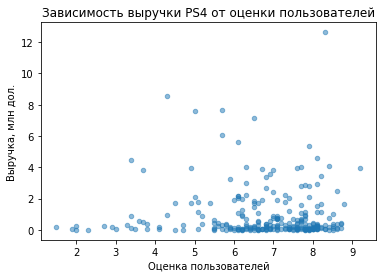

In [21]:
games_stat_ps4.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5, title='Зависимость выручки PS4 от оценки пользователей')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка пользователей')

In [22]:
games_stat_ps4['total_sales'].corr(games_stat_ps4['user_score'])

-0.031957110204556424

Text(0.5, 0, 'Оценка критиков')

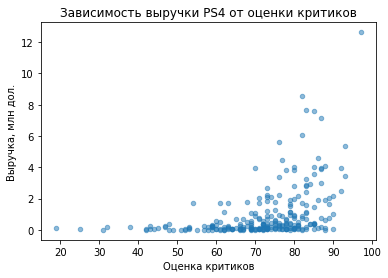

In [23]:
games_stat_ps4.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки PS4 от оценки критиков')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка критиков')

In [24]:
games_stat_ps4['total_sales'].corr(games_stat_ps4['critic_score'])

0.40589480145836687

И по графикам, и по значению корреляции видим, что отзывы критиков в большей степени влияют на продажи, чем отзывы пользователей. Больше всего выручка при оценке критиков 70 и выше.

Text(0.5, 0, 'Оценка пользователей')

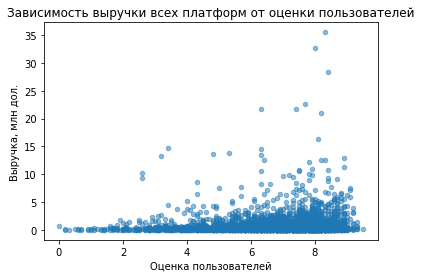

In [25]:
#Посмотрим, как графики и корреляция будут выглядеть для всех десяти платформ.


games_stat_new_filtered = games_new.query('user_score != -1 and critic_score != -1')
games_stat_new_filtered.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5, title='Зависимость выручки всех платформ от оценки пользователей')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка пользователей')

In [26]:
games_stat_new_filtered['total_sales'].corr(games_stat_new_filtered['user_score'])

0.0942143295746426

Text(0.5, 0, 'Оценка критиков')

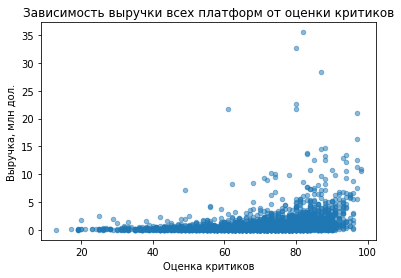

In [27]:
games_stat_new_filtered.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки всех платформ от оценки критиков')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка критиков')

In [28]:
games_stat_new_filtered['total_sales'].corr(games_stat_new_filtered['critic_score'])

0.2846687147932142

При взгляде на два последних графика можно заметить, что разница в корреляции оценка критика/выручка и оценка пользователя/выручка совсем небольшая. Для платформы PS4 она заметнее, а корреляция оценка критика/выручка сильнее.

In [29]:
#Посмотрим на общее распределение игр по жанрам.

games_new.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
action,1050.59
shooter,678.80
sports,658.07
misc,487.89
role-playing,465.03
racing,265.19
platform,230.45
simulation,199.13
fighting,166.00


С большим отрывом по продажам лидируют игры жанра Action, за ними идут жанры Sports и Shooter. Самые низкие сборы у жанров Adventure, Puzzle и Strategy.

Определите для пользователя каждого региона (NA, EU, JP):
•	Самые популярные платформы (топ-5). 
•	Самые популярные жанры (топ-5). 
•	Влияет ли рейтинг ESRB на продажи в отдельном регионе?


Северная Америка

In [30]:
(games_new
 .groupby('platform')['na_sales']
 .sum()
 .reset_index()
 .sort_values(by='na_sales', ascending=False)
 .head(5)
)

#топ 5 в северной америки

,platform,na_sales
13,X360,553.68
11,Wii,416.01
7,PS3,381.29
2,DS,273.98
8,PS4,108.74


In [95]:

top_platform = games_new.sort_values(by='na_sales', axis=0, ascending=False)[:100]

fig = px.bar(top_platform , 
             x='platform', 
             y='na_sales',
            )

fig.show()

In [31]:
(games_new
 .groupby('genre')['na_sales']
 .sum()
 .reset_index()
 .sort_values(by='na_sales', ascending=False)
 .head(5)
)

#топ 5 жанров 

,genre,na_sales
0,action,492.17
8,shooter,350.11
10,sports,323.86
3,misc,259.16
7,role-playing,175.41


In [96]:
top_genre = games_new.sort_values(by='na_sales', axis=0, ascending=False)[:100]

fig = px.bar(top_platform , 
             x='genre', 
             y='na_sales',
            )

fig.show()


In [32]:
(games_new
 .query('rating != 1')
 .groupby('rating')['na_sales']
 .sum()
 .reset_index()
 .sort_values(by='na_sales', ascending=False)
 .head(5)
)
#Рейтинг в севеной америки

,rating,na_sales
0,E,663.99
3,M,546.55
5,T,371.32
1,E10+,287.61
2,EC,1.32


In [102]:
top_genre = games_new.sort_values(by='rating', axis=0, ascending=False)[:200]

fig = px.bar(top_platform , 
             x='rating', 
             y='na_sales',
            )

fig.show()

ЕВРОПА

In [33]:
(games_new
 .groupby('platform')['eu_sales']
 .sum()
 .reset_index()
 .sort_values(by='eu_sales', ascending=False)
 .head(5)
)

#топ 5 в европе

,platform,eu_sales
7,PS3,319.83
13,X360,257.05
11,Wii,214.70
8,PS4,141.09
2,DS,119.92


In [78]:

top_platform = games_new.sort_values(by='eu_sales', axis=0, ascending=False)[:1000]

fig = px.bar(top_platform , 
             x='platform', 
             y='eu_sales',
            )

fig.show()

In [34]:
(games_new
 .groupby('genre')['eu_sales']
 .sum()
 .reset_index()
 .sort_values(by='eu_sales', ascending=False)
 .head(5)
)

#топ 5 жанров в европе

,genre,eu_sales
0,action,335.67
8,shooter,230.16
10,sports,211.49
3,misc,127.62
6,racing,104.63


In [97]:
top_genre = games_new.sort_values(by='eu_sales', axis=0, ascending=False)[:100]

fig = px.bar(top_platform , 
             x='genre', 
             y='eu_sales',
            )

fig.show()

In [103]:
(games_new
 .query('rating != 1')
 .groupby('rating')['eu_sales']
 .sum()
 .reset_index()
 .sort_values(by='eu_sales', ascending=False)
 .head(5)
)
#Рейтинг в европе

,rating,eu_sales
0,E,393.08
3,M,385.86
5,T,217.89
1,E10+,162.75
4,RP,0.03


In [106]:
top_genre = games_new.sort_values(by='rating', axis=0, ascending=False)[:1000]

fig = px.bar(top_platform , 
             x='rating', 
             y='eu_sales',
            )

fig.show()

ЯПОНИЯ

In [36]:
(games_new
 .groupby('platform')['jp_sales']
 .sum()
 .reset_index()
 .sort_values(by='jp_sales',ascending=False)
 .head(5)
)

#топ 5 в японии

,platform,jp_sales
2,DS,102.93
0,3DS,100.62
7,PS3,78.33
9,PSP,66.24
11,Wii,59.13


In [79]:

top_platform = games_new.sort_values(by='jp_sales', axis=0, ascending=False)[:1000]

fig = px.bar(top_platform , 
             x='platform', 
             y='jp_sales',
            )

fig.show()

In [37]:
(games_new
 .groupby('genre')['jp_sales']
 .sum()
 .reset_index()
 .sort_values(by='jp_sales', ascending=False)
 .head(5)
)

#топ 5 жанров в японии

,genre,jp_sales
7,role-playing,150.55
0,action,96.29
3,misc,48.79
10,sports,40.28
1,adventure,26.91


In [99]:
top_genre = games_new.sort_values(by='jp_sales', axis=0, ascending=False)[:200]

fig = px.bar(top_platform , 
             x='genre', 
             y='jp_sales',
            )

fig.show()

In [38]:
(games_new
 .query('rating != 1')
 .groupby('rating')['jp_sales']
 .sum()
 .reset_index()
 .sort_values(by='jp_sales', ascending=False)
 .head(5)
)
#Рейтинг в японии

,rating,jp_sales
0,E,95.06
5,T,74.74
3,M,41.09
1,E10+,31.91
2,EC,0.00


In [112]:
top_genre = games_new.sort_values(by='rating', axis=0, ascending=False)[:80]

fig = px.bar(top_platform , 
             x='rating', 
             y='jp_sales',
            )

fig.show()

Вывод:

В северной Америке более популярны X360, Wii, PS4, PS3.
Самые популярные жанры Спор и Шутер.
Игры с рейтингом T и  M продавались лучше всего.

В Европе более популярны  X360, Wii, PS4, PS3.
Самые популярные жанры Спор и Шутер, так же в топе racing(в отличие от сша)
Игры с рейтингом  T и  M продавались лучше всего.


В Японии более популярны  Wii, PSP,PS3
Самые популярные жанры Sports, role-playing
Игры с рейтингом T и  M продавались лучше всего.

В целом по жанру и платформам у Японии большое отличие от США и Европы.

# Проверим гипотезу что средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Проверим гипотезу что средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую и альтернативную гипотезы. Нулевую гипотезу будем формулировать так, чтобы использовать знак равенства. Альтернативную гипотезу сформулируем оттакливаясь от нулевой гипотезы.

H₀ - средние пользовательские рейтинги платформ Xbox One и PC равны
H₁ - средние пользовательские рейтинги платформ Xbox One и PC не равны

Зададим критический уровень статистической значимости
alpha = .05

In [39]:
games_stat_new_filtered['user_score']

2        8.3
3        8.0
8        8.4
13       7.7
14       6.3
        ... 
16660    6.7
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 4403, dtype: float64

In [40]:
xone = games_stat_new_filtered[(games_stat_new_filtered['platform'] == 'XOne') & (games_stat_new_filtered['user_score'] > 1)]['user_score']
pc = games_stat_new_filtered[(games_stat_new_filtered['platform'] == 'PC') & (games_stat_new_filtered['user_score'] > 1)]['user_score']

In [41]:
alpha=0.05

In [47]:
results = st.ttest_ind(
    games_stat_new_filtered.query('platform == "X360"')['user_score'], 
    games_stat_new_filtered.query('platform == "PC"')['user_score'])

print ('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.12221124813861341
Не получилось отвергнуть нулевую гипотезу




H₀ - средние пользовательские рейтинги жанров Action и Sports равны
H₁ - средние пользовательские рейтинги жанров Action и Sports не равны

In [43]:
action = games_stat_new_filtered.query('genre == "action"')
sports = games_stat_new_filtered.query('genre == "sports"')

In [48]:
results = st.ttest_ind(
    games_stat_new_filtered.query('genre == "action"')['user_score'], 
    games_stat_new_filtered.query('genre == "sports"')['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0894514919563483e-12
Отвергаем нулевую гипотезу


Вывод: средние пользовательские рейтинги платформ Xbox One и PC не равны и средние пользовательские рейтинги жанров Action и Sports не равны.

# Общий вывод:
Можно сделать вывод что потенциально популярный продукт по которому нужно спланировать продажи и рекламные кампании это:

Игоровые платформы  pc, ps3, ps4, wii, x360, xone
Игровые жанры action, sports, shooter, отдельно для Японии role-playing
Игры рейтинга  «T» («Teen») — «Подросткам» «M» («Mature») — «Для взрослых»
Рейтинг пользователей и экспертов практически не влияет на продажи игры, но посматривать на него стоит.

